# Bajas de empleados en una Organización - ¿Por qué abandonan los empleados?

*"Los gerentes tienden a culpar de sus problemas de rotación a todo lo que está bajo el sol, mientras que ignoran el quid de la cuestión: la gente no deja el trabajo, deja a los gerentes"*.
Travis BradBerry

## Nota

Este kernel está basado en el trabajo realizado por **[Janio Martínez Bachmann](https://www.kaggle.com/janiobachmann)**: [Attrition in an Organization || Why Workers Quit?](https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit/notebook). Su kernel está desarrollado para R y en este notebook lo desarrollaré sobre Python.

## Introducción

Los objetivos de este notebook son varios:

+ El primero de ellos es seguir adquiriendo y consolidando conocimientos de **Python**, aplicado al entorno de Data Science.

+ **Análisis exploratorio de los datos (EDA)**. Antes de elaborar cualquier modelo predictivo conviene profundizar en el análisis de los datos, lo que nos permitirá proponer mejores hipótesis, obtener mejores conclusiones, etc.

+ **Recomendaciones**. Tras el análisis de los datos estaremos en una mejor disposición para proporcionar recomendaciones a la organización que le permita comprender qué podrían hacer mejor para evitar el efecto negativo detrás de las bajas de empleados.

+ **Modelado**. Por último, implementar un modelo predictivo para determinar si un empleado va a renunciar o no.

El desgaste o abandono se definiría como la tasa de rotación de los empleados dentro de una organización. Esta puede puede producirse por múltiples causas:

+ Empleados que buscan mejores oportunidades.
+ Un ambiente de trabajo negativo.
+ Mala gestión
+ Enfermedad de un empleado (o incluso la muerte)
+ Horas de trabajo excesivas

## Dataset

Usaremos el dataset [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). Se trata de un dataset ficticio creado por data scientists de IBM con el objetivo de descubrir los factores que conducen al desgaste o abandono de los empleados de una organizacion.

## Carga del dataset

In [1]:
# Importamos las librerías esenciales
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

%matplotlib inline

In [2]:
# Función para mostrar los valores en los gráficos
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):        
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = f'{p.get_height():.0f}'
                ax.text(_x, _y, value, ha="center") 
        else:
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = f'{p.get_height():.0f}'
                ax.text(_x, _y, value, ha="left") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Resumen de nuestros datos

***Pregunta 1***: ¿Cuántas variables y observaciones tenemos en nuestro dataset?

In [4]:
df.shape

(1470, 35)

*Respuesta 1*: 1.470 observaciones (filas) y 35 variables (columnas)

***Pregunta 2***: ¿Hay datos faltantes en nuestro dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*Respuesta 2:* Afortunadamente no existen ninguna dato nulo o vacío. Todas las observaciones tienen todas las variables cumplimentadas. Otra forma de ver si tenemos datos faltantes es usando la librería **`missingno`** como se muestra a continuación:

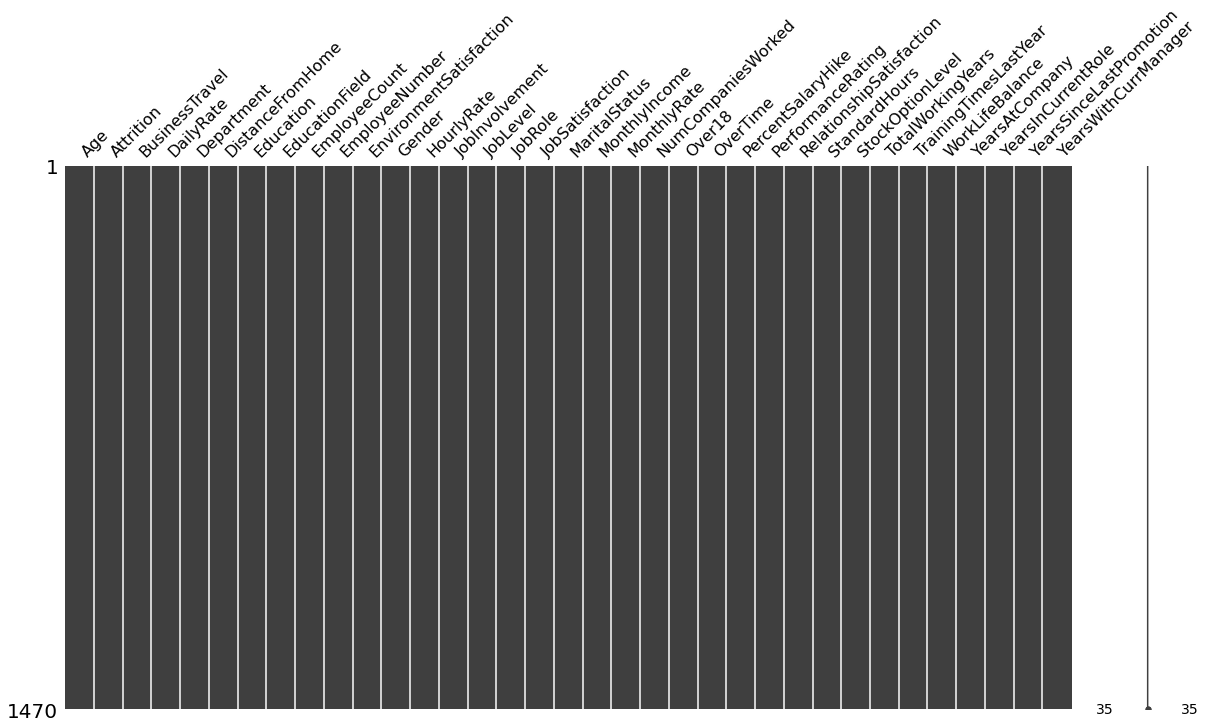

In [6]:
missingno.matrix(df, figsize = (20,10));

Este gráfico nos indica que todas las variables están completamente valoradas.

***Pregunta 3***: ¿Qué tipos de datos nos encontramos en este dataset?

*Respuesta 3*: Como vemos en la relación de columnas obtenida anteriormente, sólo tenemos dos tipos de datos: enteros y object (string).

***Pregunta 4***: En nuestro dataset ¿Cuál es nuestro target?

*Respuesta 4*: La variable target de nuestro dataset es `Attrition`. Dicha variable nos indica si el empleado ha causado baja (Yes/No).

***Distribución de nuestros datos***: ¿Es sesgada a la derecha, sesgada a la izquierda o simétrica? Esto podría ser útil, especialmente si estamos implementando cualquier tipo de análisis estadístico o incluso para el modelado.

***Significado de nuestros datos***: ¿Qué significan nuestros datos? La mayoría de las características en este conjunto de datos son variables ordinales que son similares a las variables categóricas, sin embargo, el orden de esas variables es importante. Muchas de las variables en este conjunto de datos tienen un rango de 1-4 o 1-5, cuanto más baja sea la variable ordinal, peor es en este caso. Por ejemplo, Job Satisfaction 1 = "Low" mientras que 4 = "Very High".

***Pregunta 5***: ¿Cómo de equilibrado es nuestro dataset respecto a la variable target?

In [7]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
df["Attrition"].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

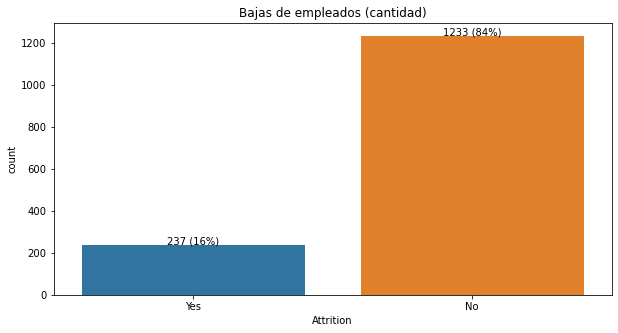

In [9]:
figure, axs = plt.subplots(figsize=(10,5))
ax = sns.countplot(df["Attrition"]);
plt.title("Bajas de empleados (cantidad)")
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height} ({round((height/total) * 100):.0f}%)',
            ha="center");

*Respuesta 5*: es un dataset desequilibrado. 1.233 (84% de los casos) de los empleados no abandonaron la organización, mientras que 237 (16% de los casos) dejaron la organización, por lo que nuestro conjunto de datos se considera ***desequilibrado***.

## Análisis de género:
En esta sección, trataremos de ver si hay discrepancias entre hombres y mujeres en la organización. Además, analizaremos otra información básica como la edad, el nivel de satisfacción laboral y el salario promedio por género.

### Edad por género
**¿Cuál es la distribución por edades entre hombres y mujeres?**

In [10]:
df_group = df[["Gender", "Age"]].groupby("Gender")
df_group.mean()

,Age
Gender,
Female,37.329932
Male,36.653061


*Respuesta*: Comprobamos que la edad promedio de las mujeres es de 37.33 y para los hombres es de 36.65.

Vamos a ver cómo se visualiza la distribución de edades.

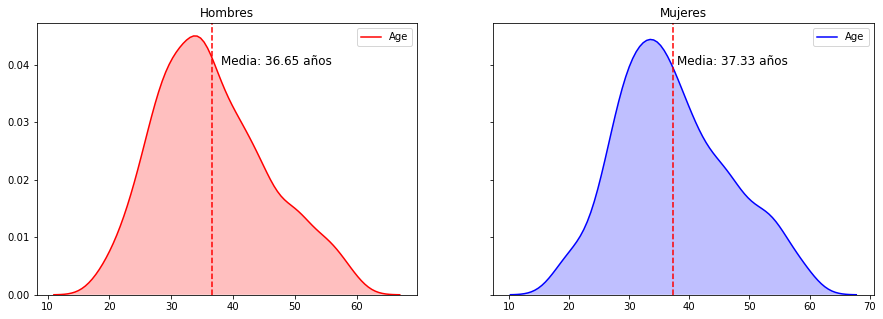

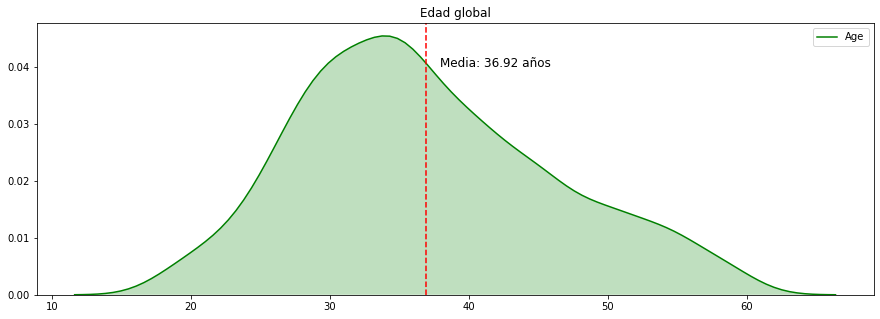

In [11]:
figure, axs = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.kdeplot(df[df["Gender"] == "Male"]['Age'], shade=True, color="r", ax=axs[0])
sns.kdeplot(df[df["Gender"] == "Female"]['Age'], shade=True, color="b", ax=axs[1])
axs[0].title.set_text('Hombres')
axs[1].title.set_text('Mujeres')
# Dibujamos una línea vertical en cada gráfico
# identificando la media de edad de cada uno de los grupos
male_mean = round(df[df["Gender"] == "Male"]["Age"].mean(), 2)
female_mean = round(df[df["Gender"] == "Female"]["Age"].mean(), 2)
axs[0].axvline(male_mean, color="r", linestyle="--")
axs[1].axvline(x=female_mean, color="r", linestyle="--")
# Dibujamos la leyenda de la media
axs[0].text(38, 0.04, f'Media: {male_mean} años', fontsize = 12)
axs[1].text(38, 0.04, f'Media: {female_mean} años', fontsize = 12);

# Dibujamos la gráfica global
media_edad = round(df["Age"].mean(), 2)
figure, axs = plt.subplots(nrows=1, sharey=True, figsize=(15,5))
sns.kdeplot(df['Age'], shade=True, color="g")
plt.title('Edad global')
plt.axvline(x=media_edad, color="r", linestyle="--")
plt.text(media_edad + 1, 0.04, 'Media: '+ str(media_edad) + ' años', fontsize = 12);

Ambas distribuciones (hombre y mujeres) son muy similares.

### Distribución de la satisfacción en el trabajo

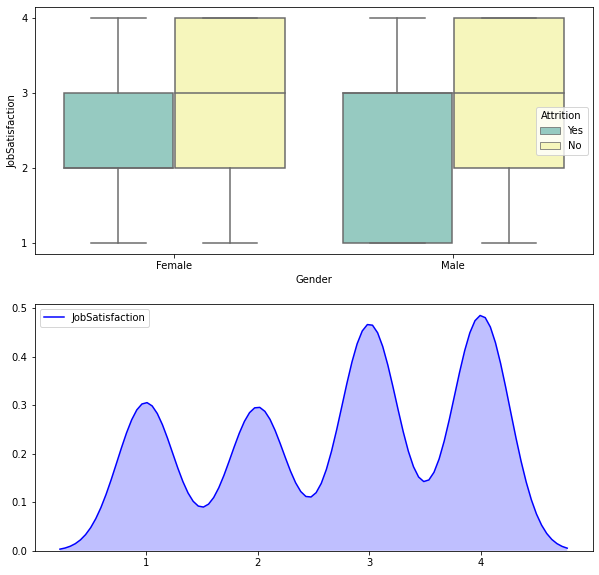

In [12]:
figure, axs = plt.subplots(nrows=2, figsize=(10,10))
axs[0].set_yticks(df["JobSatisfaction"].unique())  # Establecemos los valores del eje "y" que queremos (JobSatisfaction es categórica)
sns.boxplot(x="Gender", y="JobSatisfaction", hue="Attrition", data=df, palette="Set3", ax=axs[0])
sns.kdeplot(df["JobSatisfaction"], shade=True, color="b", ax=axs[1]);

Vemos que para las personas que no abandonaron la organización, los niveles de satisfacción laboral son prácticamente los mismos entre hombre y mujeres. Sin embargo, para las personas que abandonaron la organización, las mujeres tenían un nivel de satisfacción más bajo en comparación con los hombres.

### Ingresos mensuales por género

In [13]:
df_group = df[["Gender", "MonthlyIncome"]].groupby("Gender")
df_group.describe()

MonthlyIncome                                                    \
               count         mean          std     min     25%     50%   
Gender                                                                   
Female         588.0  6686.566327  4695.608507  1129.0  3037.0  5081.5   
Male           882.0  6380.507937  4714.856577  1009.0  2819.5  4837.5   

                          
            75%      max  
Gender                    
Female  8711.75  19973.0  
Male    8113.75  19999.0

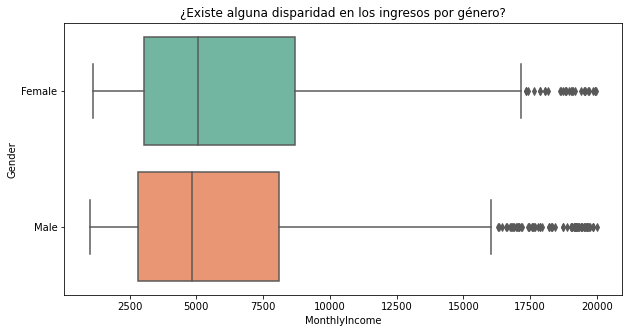

In [14]:
figure, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x="MonthlyIncome", y="Gender", data=df, palette="Set2", ax=axs)
plt.title("¿Existe alguna disparidad en los ingresos por género?");

### Media de ingresos y presencia por departamento

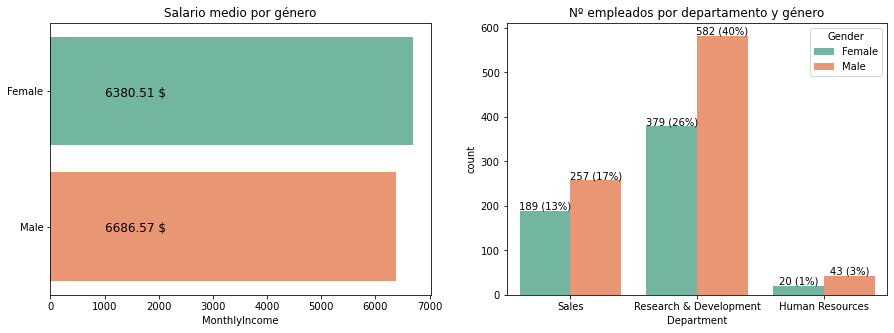

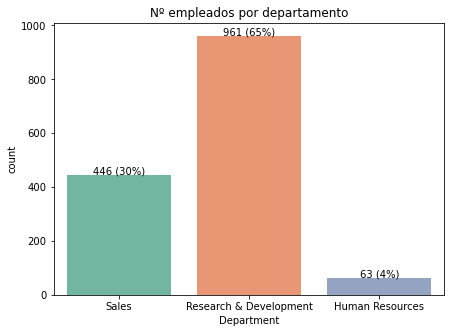

In [15]:
total = len(df)

figure, axs = plt.subplots(ncols=2, figsize=(15,5))

# Salario medio por género
df_gender_income = df[["Gender", "MonthlyIncome"]].groupby("Gender").mean()
sns.barplot(x=df_gender_income["MonthlyIncome"], y=df_gender_income.index.values, orient="h", palette="Set2", ax=axs[0])
axs[0].title.set_text('Salario medio por género')
avg_male = round(df_gender_income.loc["Male"][0],2)
avg_female = round(df_gender_income.loc["Female"][0],2)
axs[0].text(1000, 0.04, str(avg_male) + " $", fontsize = 12)
axs[0].text(1000, 1.04, str(avg_female) + " $", fontsize = 12)

# Nº de empleados por departamento (por género)
g = sns.countplot(x='Department', hue="Gender", data=df, palette="Set2", ax=axs[1])
axs[1].title.set_text('Nº empleados por departamento y género')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height} ({round((height/total) * 100):.0f}%)',
            ha="center")

# Nº de empleados por departamento
figure, axs = plt.subplots(figsize=(7,5))
g = sns.countplot(x='Department', data=df, palette="Set2", ax=axs);
plt.title('Nº empleados por departamento')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height} ({round((height/total) * 100):.0f}%)',
            ha="center");

Los **salarios medios** para ambos sexos son prácticamente los mismos, teniendo los hombres un promedio de 6380.51 y las mujeres 6686.57. Respecto a los **departamentos** comprobamos que hay un mayor número de hombres en los tres departamentos.

## Análisis por Generación y Educación

Es bien sabido que cada tipo de generación tiene sus particularidades, así que podría ser interesante explorar este atributo en el dataset. Nos haremos preguntas del tipo ¿Cuál es el promedio de empresas en las que trabajaron anteriormente por cada generación? El objetivo es verificar si es cierto que las generaciones más mayores permanecen más tiempo en una empresa.

En primer lugar vamos a crear una variable categórica en función de la edad del empleado, denominada `Generation`:

In [16]:
conditions = [df["Age"] < 38, (df["Age"] >= 38) & (df["Age"] < 54), (df["Age"] >= 54) & (df["Age"] < 73)]
choices = ["Millenials", "Generation X", "Boomers"]
df["Generation"] = np.select(conditions, choices, default="Silent")

Vamos a comprobar cómo se distribuyen

In [17]:
df["Generation"].value_counts(normalize=True)

Millenials      0.576871
Generation X    0.363946
Boomers         0.059184
Name: Generation, dtype: float64

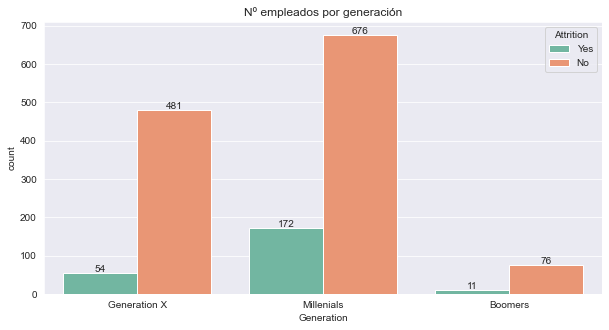

In [18]:
# Nº de empleados por generación
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
g = sns.countplot(x='Generation', data=df, hue="Attrition", palette="Set2");
plt.title('Nº empleados por generación')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            f'{height}',
            ha="center");

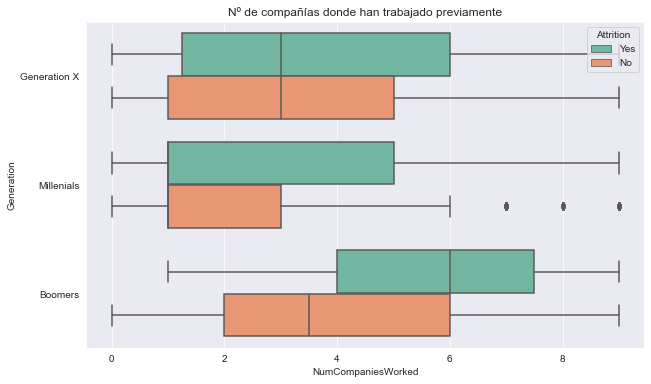

In [19]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,6))
sns.boxplot(x="NumCompaniesWorked", y="Generation", data=df, hue="Attrition", palette="Set2", ax=axs)
plt.title("Nº de compañías donde han trabajado previamente")
plt.legend(loc='upper right', title="Attrition");

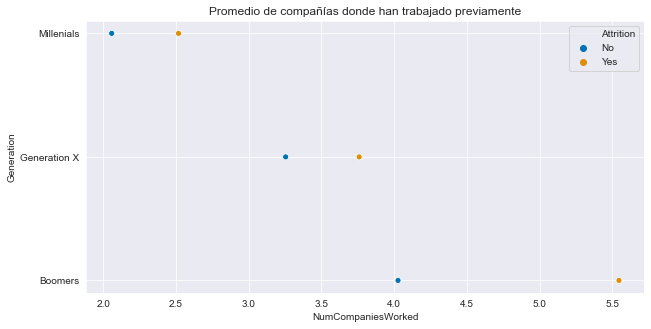

In [20]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df.groupby(["Generation", "Attrition"], as_index=False)["NumCompaniesWorked"].mean(), 
                x="NumCompaniesWorked", y="Generation", hue="Attrition", palette="colorblind")
plt.title("Promedio de compañías donde han trabajado previamente");

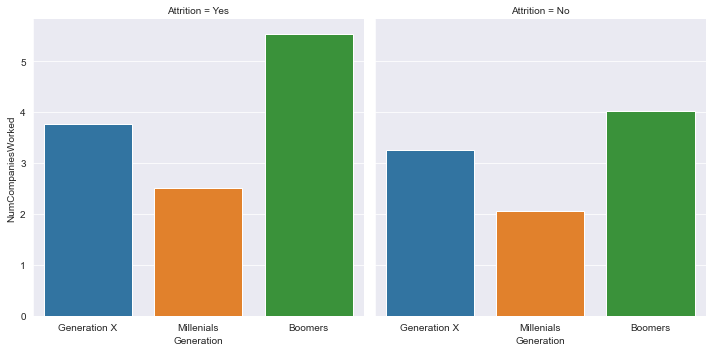

In [21]:
sns.set_style("darkgrid")
g = sns.catplot(x="Generation", y="NumCompaniesWorked", 
            col="Attrition", data=df, kind="bar",
            ci=None);

Vamos a crear una variable categórica en función de la educación, denominada `Educational_Levels`:

In [22]:
conditions = [df["Education"] == 1, df["Education"] == 2, df["Education"] == 3, df["Education"] == 4]
choices = ["Without College D.", "College D.", "Licenciado", "Master"]
df["Educational_Levels"] = np.select(conditions, choices, default="Doctorado")

In [23]:
df["Educational_Levels"].value_counts()

Licenciado            572
Master                398
College D.            282
Without College D.    170
Doctorado              48
Name: Educational_Levels, dtype: int64

In [24]:
df.groupby(["Educational_Levels", "Attrition"], as_index=False)["Education"].count()

,Educational_Levels,Attrition,Education
0,College D.,No,238
1,College D.,Yes,44
2,Doctorado,No,43
3,Doctorado,Yes,5
4,Licenciado,No,473
5,Licenciado,Yes,99
6,Master,No,340
7,Master,Yes,58
8,Without College D.,No,139
9,Without College D.,Yes,31


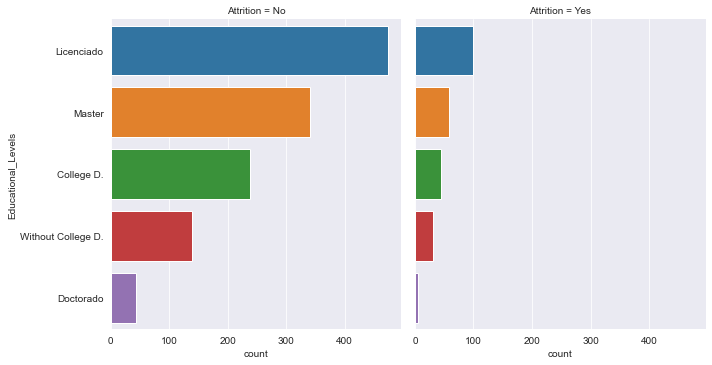

In [25]:
sns.set_style("darkgrid")
g = sns.catplot(y="Educational_Levels", col="Attrition", col_order=["No", "Yes"],
            data=df, kind="count", order=df["Educational_Levels"].value_counts().index,
            ci=None);

In [26]:
# Muestra el porcentaje de abandono por cada nivel educativo
educational_list = df["Educational_Levels"].unique()
for edu in educational_list:
    df_edu = df[df["Educational_Levels"] == edu]['Attrition'].value_counts(normalize=True)
    print(f"{edu:20} -> Yes {df_edu['No'] * 100:.0f}% - No {df_edu['Yes'] * 100:.0f}%")


College D.           -> Yes 84% - No 16%
Without College D.   -> Yes 82% - No 18%
Master               -> Yes 85% - No 15%
Licenciado           -> Yes 83% - No 17%
Doctorado            -> Yes 90% - No 10%


### Conclusiones del análisis anterior

- **Empleados que abandonaron la organización**: para este tipo de empleados vemos que los boomers trabajaron anteriormente en un mayor número de empresas.

- **Millenials**: la mayoría de los millenials todavía son relativamente jóvenes, por lo que eso explica por qué el número de compañías previas de los millenials es relativamente bajo.

- **Abandono por generación**: Parece que los millenials son los que tienen la tasa de rotación más alta.

- **Abandono por nivel de educación**: Esto va de la mano con la declaración anterior, ya que los licenciados son los que muestran el mayor nivel de deserción, lo que tiene sentido ya que los Millenials crean la tasa de rotación más alta dentro de la organización. Sin embargo, en proporción todos los niveles educativos muestran un porcentaje de abandono similar (entre el 15% y el 18%), excepto *Doctorado* que tiene una proporción más baja (10%).

## Impacto de los ingresos en el abandono

¿Cuánta importancia otorgan los empleados a sus salarios?

También intentaremos responder las siguientes preguntas:

* ¿Cuál es el ingreso mensual promedio por **departamento**? ¿Existen diferencias significativas entre las personas que se fueron y las que no lo hicieron?
* ¿Hay cambios significativos en el **nivel de ingresos por satisfacción laboral**? ¿Las personas con **menor satisfacción** obtienen mucho menos ingresos que las que están más satisfechas?
* ¿Los empleados que abandonaron la organización tienen ingresos mucho más bajos que las personas que no abandonaron la organización?
* ¿Los empleados con una calificación de desempeño más alta ganan más que que los que obtienen una calificación más baja? ¿Es la diferencia significativa desde el punto de vista del abandono?


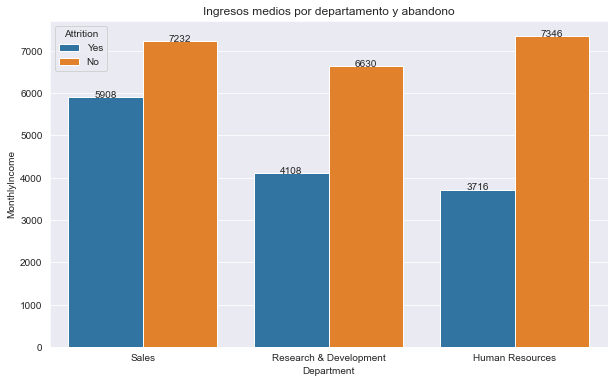

In [27]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,6))
sns.barplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df, ci=None)
plt.title('Ingresos medios por departamento y abandono')
show_values_on_bars(axs)

In [28]:
df.groupby(["JobSatisfaction","Attrition"], as_index=False)["MonthlyIncome"].mean()

,JobSatisfaction,Attrition,MonthlyIncome
0,1,No,7096.901345
1,1,Yes,4752.803030
2,2,No,6834.893162
3,2,Yes,4962.760870
4,3,No,6853.311653
5,3,Yes,4595.986301
6,4,No,6668.113022
7,4,Yes,4943.500000


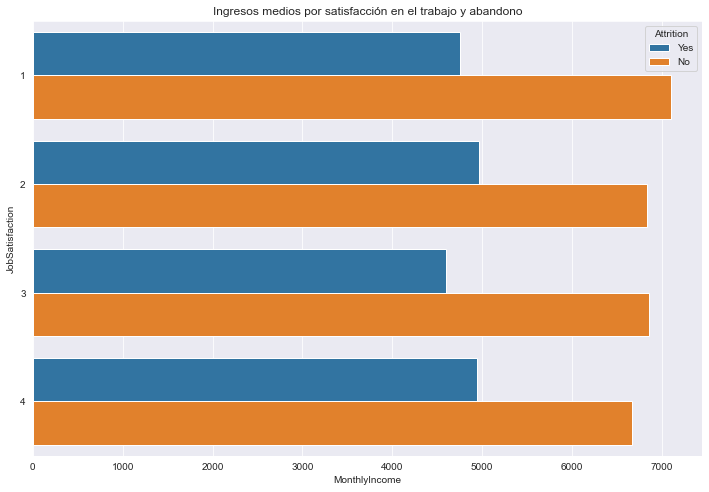

In [29]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(12,8))
sns.barplot(y="JobSatisfaction", x="MonthlyIncome", hue="Attrition", data=df, ci=None, orient="h")
plt.title('Ingresos medios por satisfacción en el trabajo y abandono');

In [30]:
df.groupby("PercentSalaryHike")["Attrition"].describe()

,count,unique,top,freq
PercentSalaryHike,,,,
11,210,2,No,169
12,198,2,No,165
13,209,2,No,175
14,201,2,No,177
15,101,2,No,83
16,78,2,No,64
17,82,2,No,68
18,89,2,No,76
19,76,2,No,67


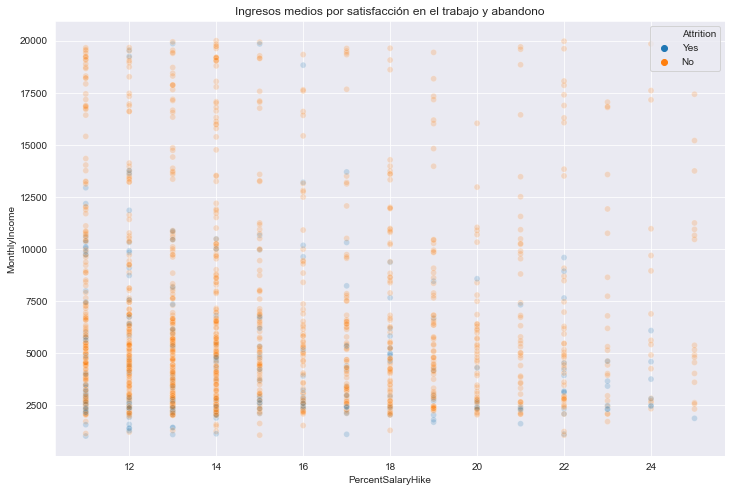

In [37]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(12,8))
sns.scatterplot(x="PercentSalaryHike", y="MonthlyIncome", hue="Attrition", data=df, alpha=0.2)
plt.title('Ingresos medios por satisfacción en el trabajo y abandono');

### Conclusiones del análisis anterior

- **Ingresos por departamento**: Se pueden observar grandes diferencias por departamento en lo que respecta al abandono. Las persona que abandonan la empresa tienen una salario medio menor que las que no la abandonan.

- **Ingresos por satisfacción laboral**: Parece que cuanto menor es la satisfacción laboral, mayor es la brecha por estado de deserción en los niveles de ingresos.